## IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

## READING THE FILE

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\nasa.csv")
df.head(5)

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [4]:
df["Hazardous"]=df["Hazardous"].astype(object)

## SEPARATING NUM , CAT

In [5]:
cat_cols=df.select_dtypes(include="object")
num_cols=df.select_dtypes(include="number")

In [6]:
cat_cols.head()

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000,True
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000,False
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000,True
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000,False
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000,True


In [7]:
cat_cols["Close Approach Date"]=pd.to_datetime(cat_cols["Close Approach Date"])

In [8]:
cat_cols["Orbit Determination Date"]=pd.to_datetime(cat_cols["Orbit Determination Date"])

In [9]:
cat_cols.dtypes

Close Approach Date         datetime64[ns]
Orbiting Body                       object
Orbit Determination Date    datetime64[ns]
Equinox                             object
Hazardous                           object
dtype: object

In [10]:
num_cols.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,17,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,21,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,22,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,7,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,25,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


In [11]:
num_cols.isnull().sum()/len(num_cols)*100

Neo Reference ID                0.0
Name                            0.0
Absolute Magnitude              0.0
Est Dia in KM(min)              0.0
Est Dia in KM(max)              0.0
Est Dia in M(min)               0.0
Est Dia in M(max)               0.0
Est Dia in Miles(min)           0.0
Est Dia in Miles(max)           0.0
Est Dia in Feet(min)            0.0
Est Dia in Feet(max)            0.0
Epoch Date Close Approach       0.0
Relative Velocity km per sec    0.0
Relative Velocity km per hr     0.0
Miles per hour                  0.0
Miss Dist.(Astronomical)        0.0
Miss Dist.(lunar)               0.0
Miss Dist.(kilometers)          0.0
Miss Dist.(miles)               0.0
Orbit ID                        0.0
Orbit Uncertainity              0.0
Minimum Orbit Intersection      0.0
Jupiter Tisserand Invariant     0.0
Epoch Osculation                0.0
Eccentricity                    0.0
Semi Major Axis                 0.0
Inclination                     0.0
Asc Node Longitude          

## DETECTING OUTLIERS

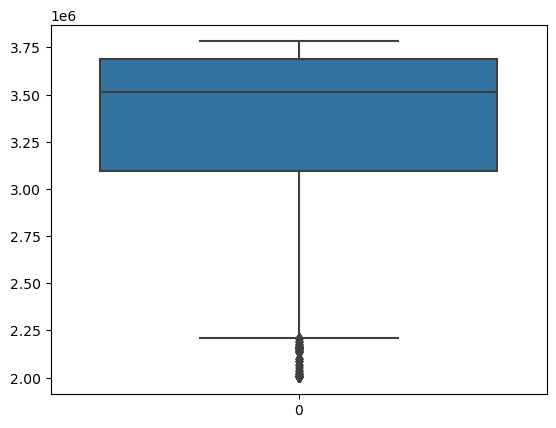

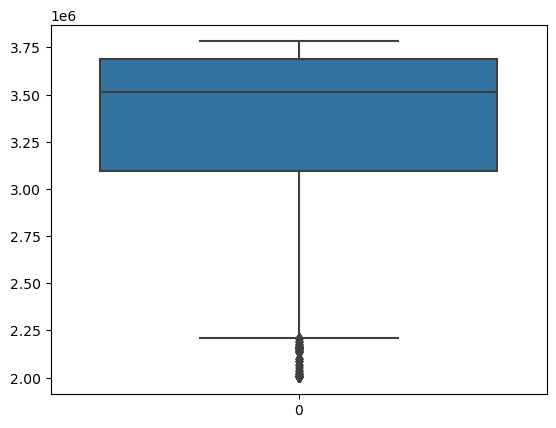

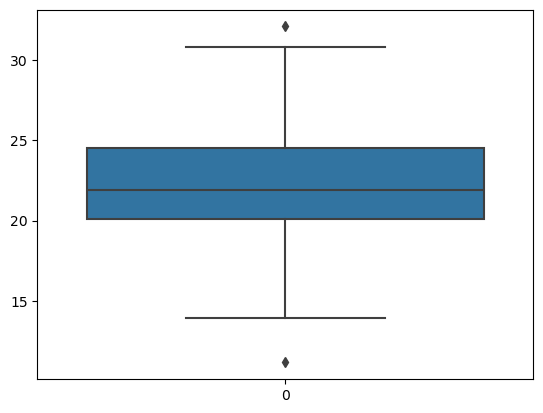

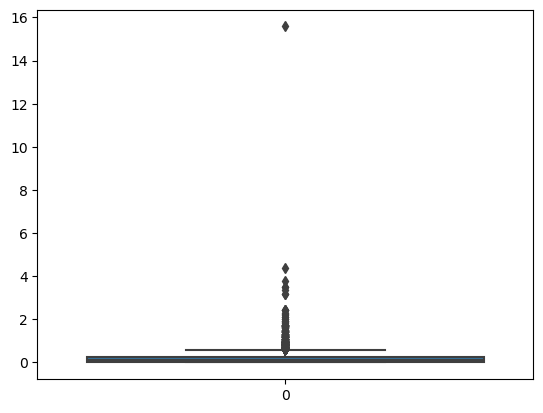

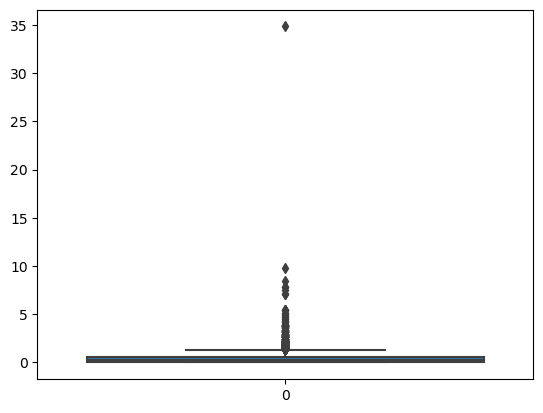

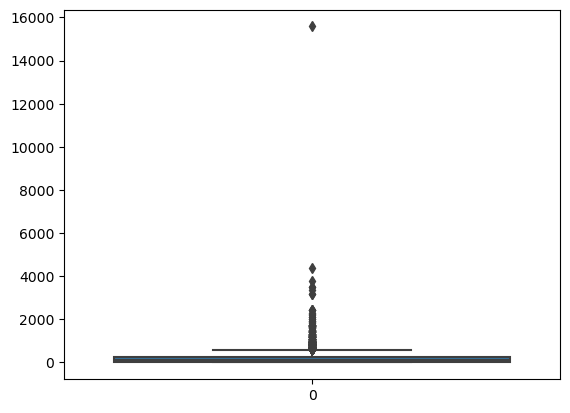

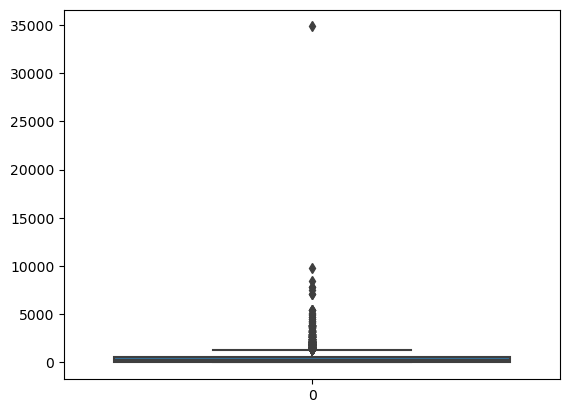

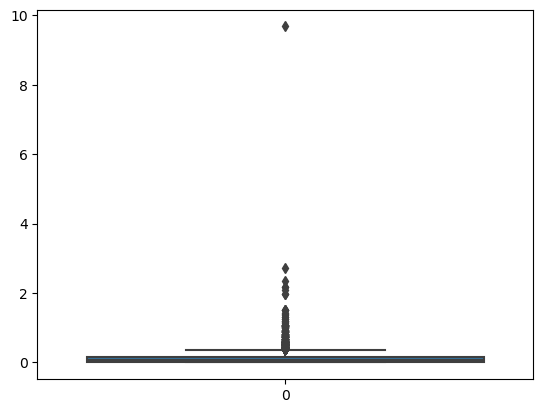

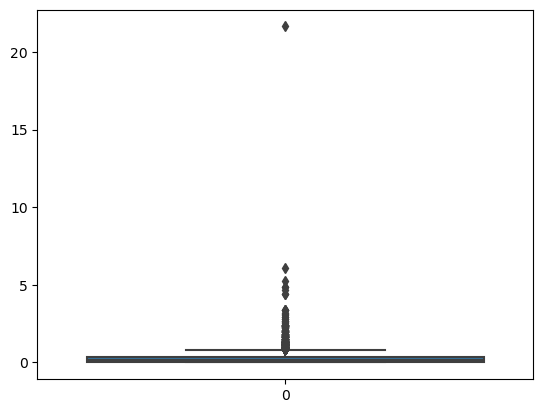

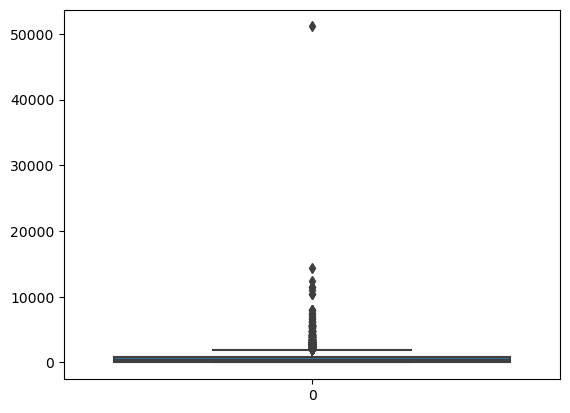

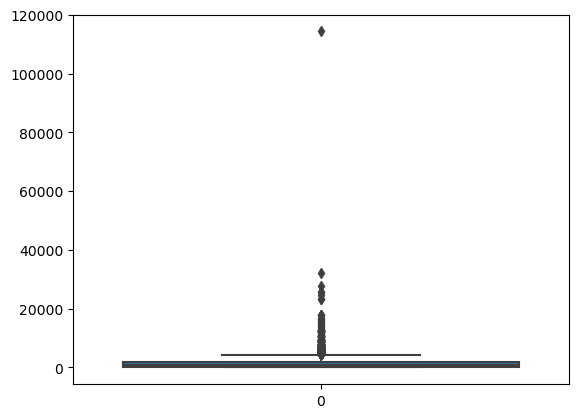

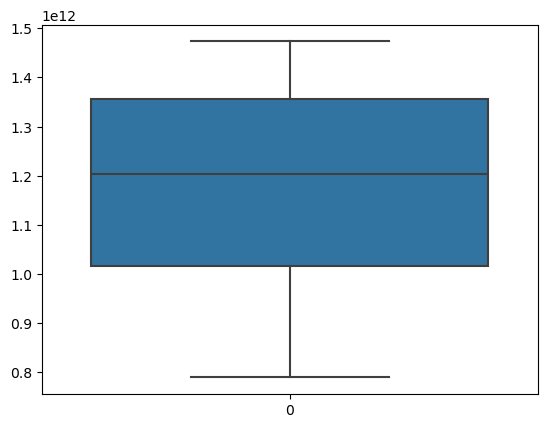

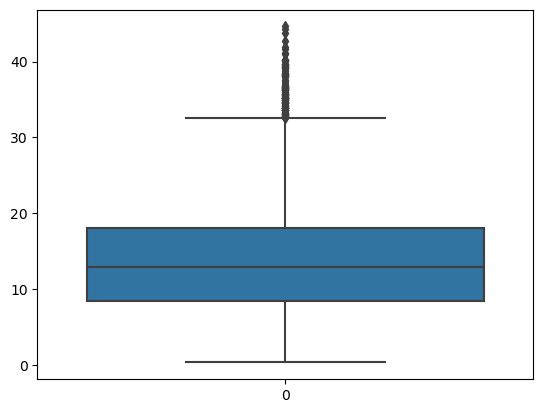

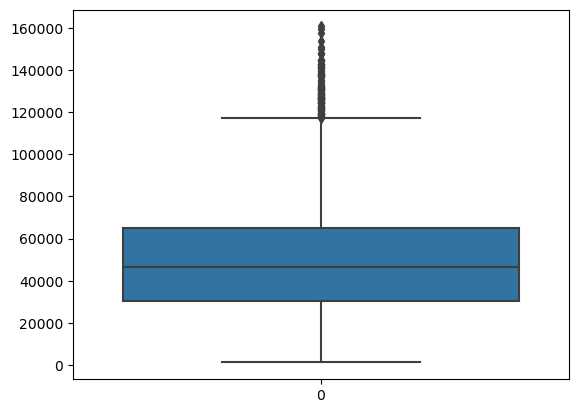

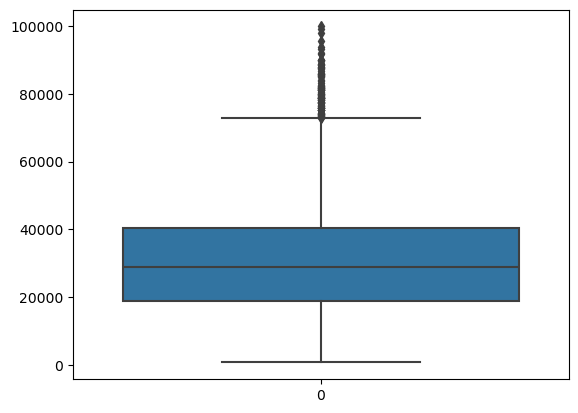

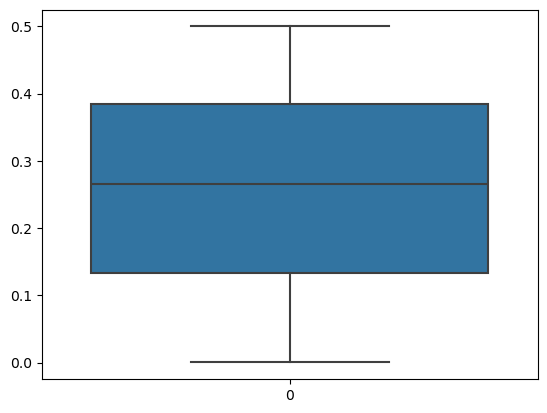

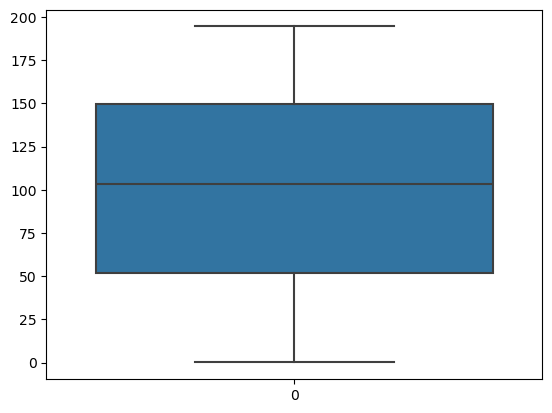

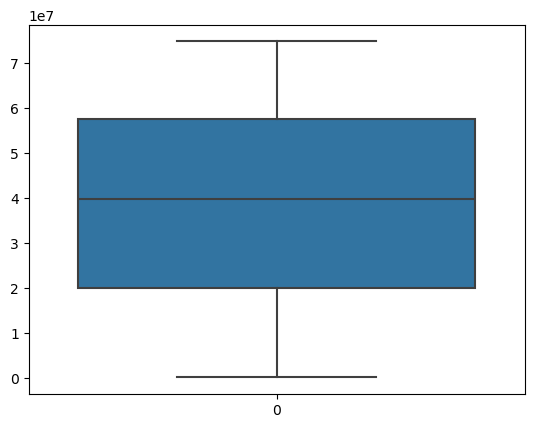

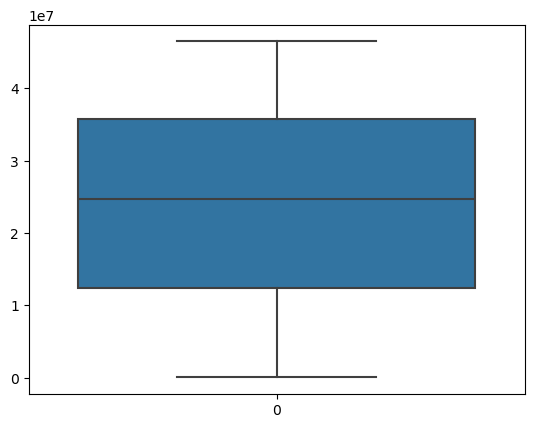

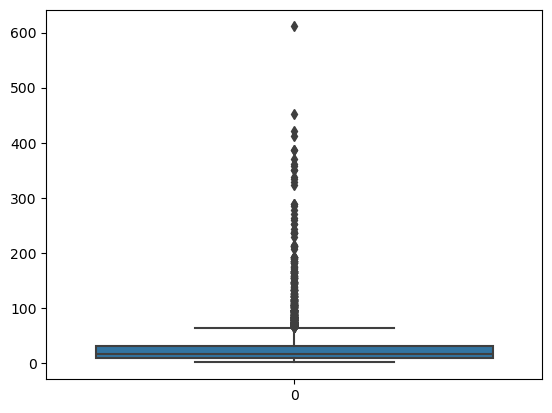

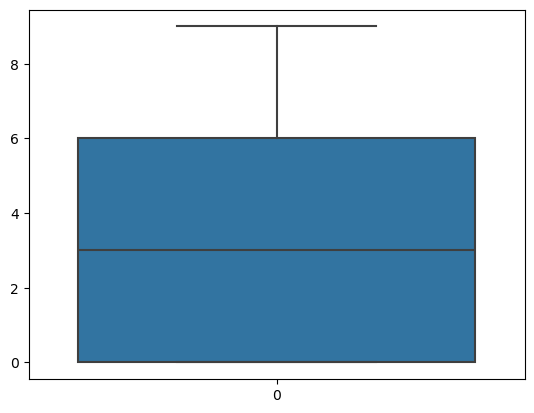

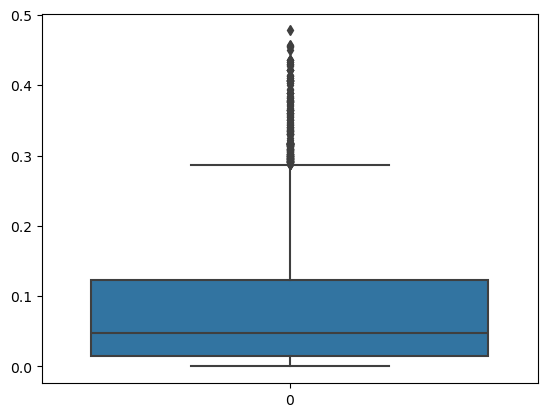

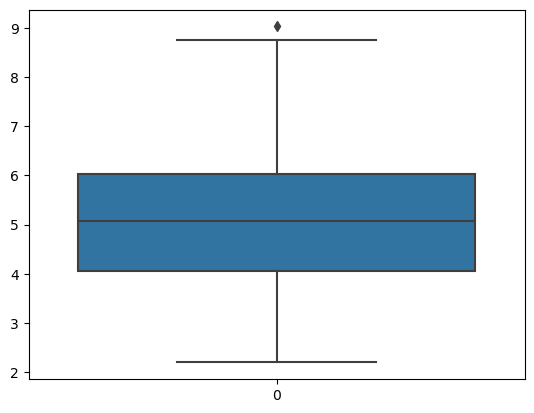

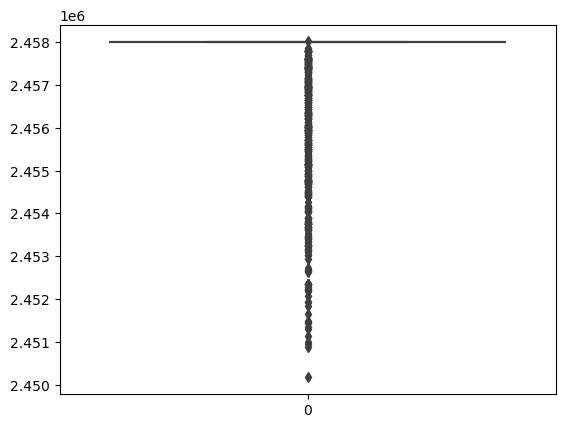

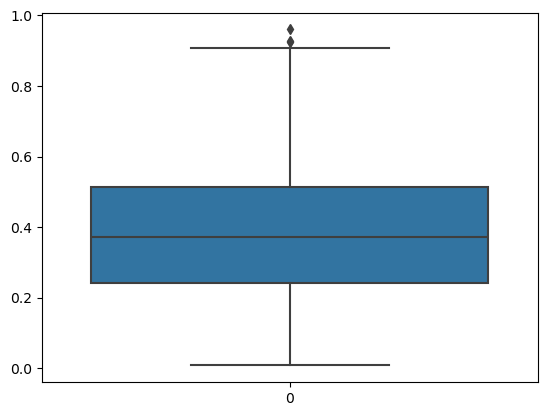

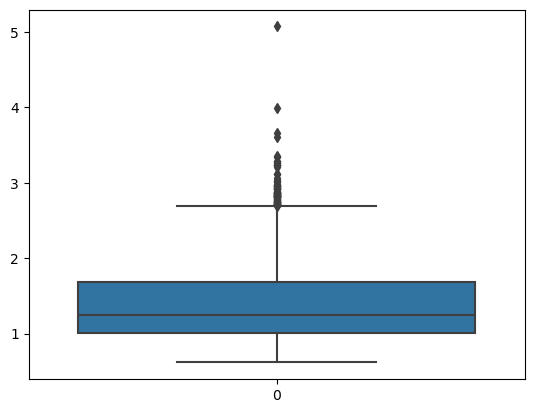

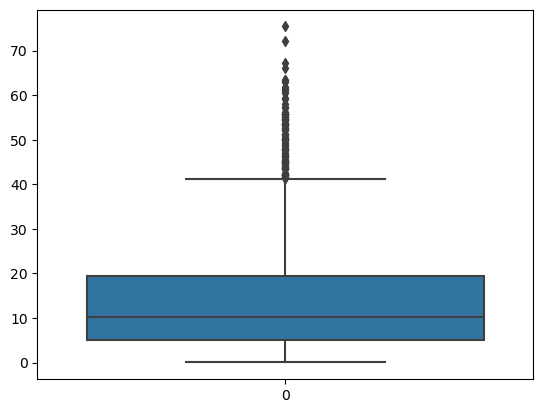

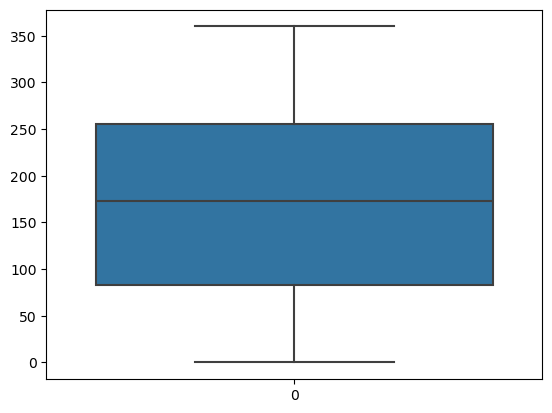

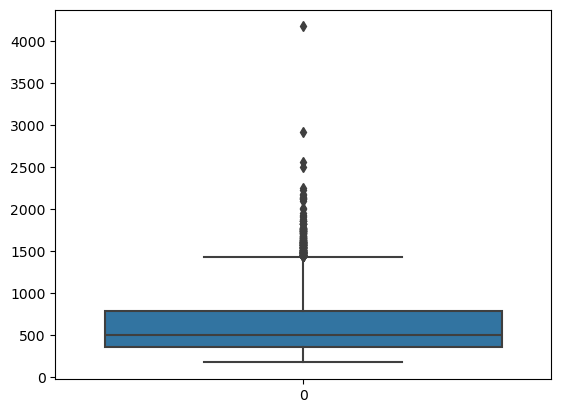

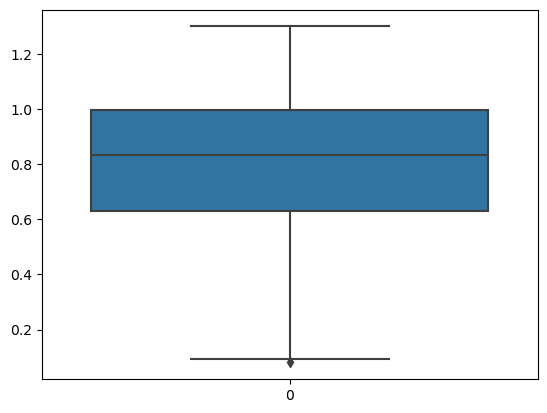

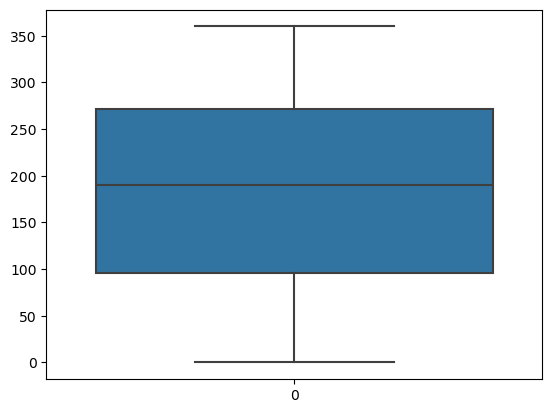

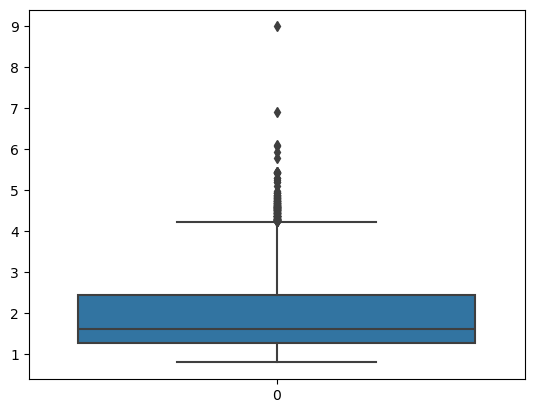

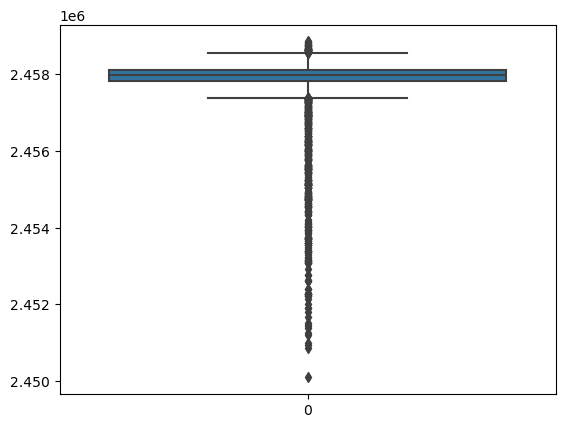

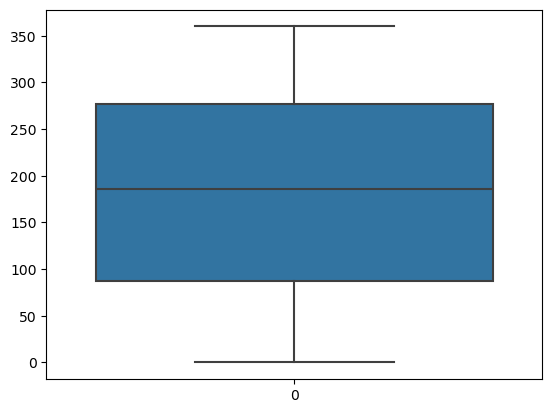

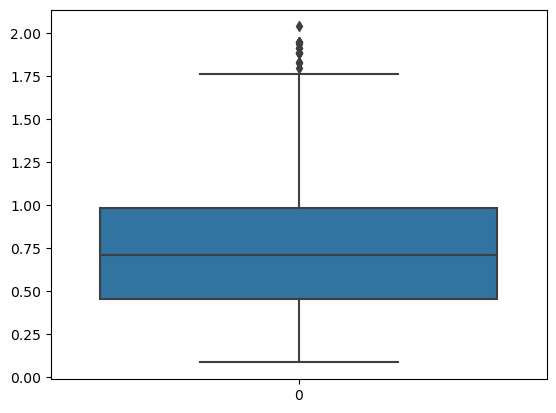

In [12]:
for col in num_cols:
    sns.boxplot(num_cols[col])
    plt.show()

## REMOVING OUTLIERS

In [13]:
def wisker(col):
   q1=num_cols[col].quantile(0.25)
   q3=num_cols[col].quantile(0.75)
   iqr=q3-q1
   lower=q1-(1.5*iqr)
   upper=q3+(1.5*iqr)
   return lower,upper

In [14]:
for i in num_cols:
  lower,upper=wisker(i)
  num_cols[i]=np.where(num_cols[i]<lower,lower,num_cols[i])   
  num_cols[i]=np.where(num_cols[i]>upper,upper,num_cols[i])

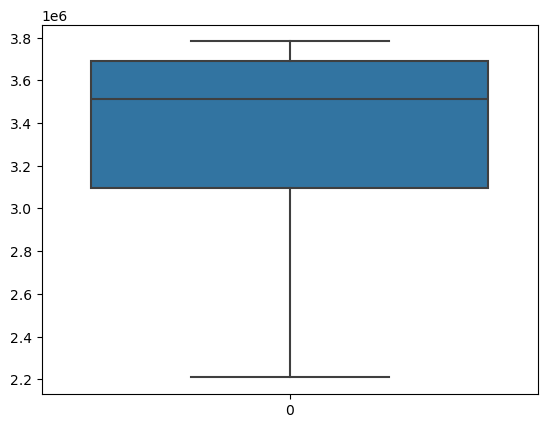

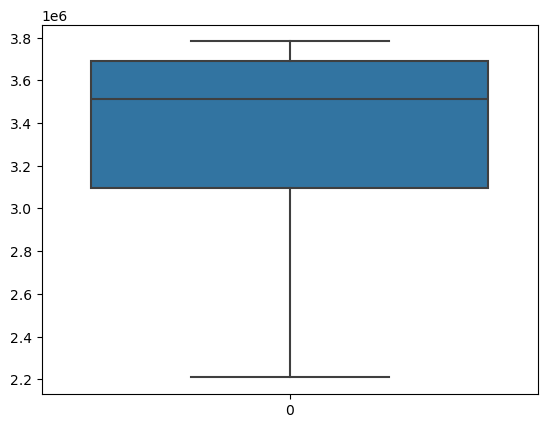

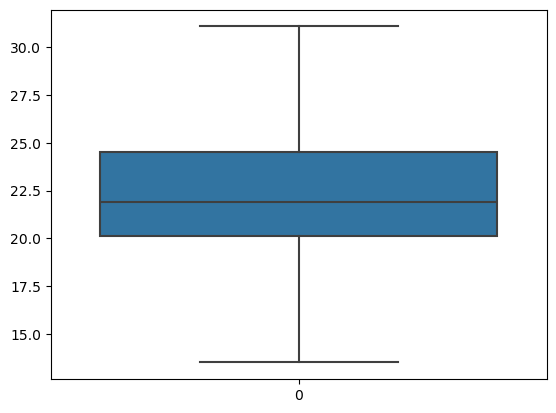

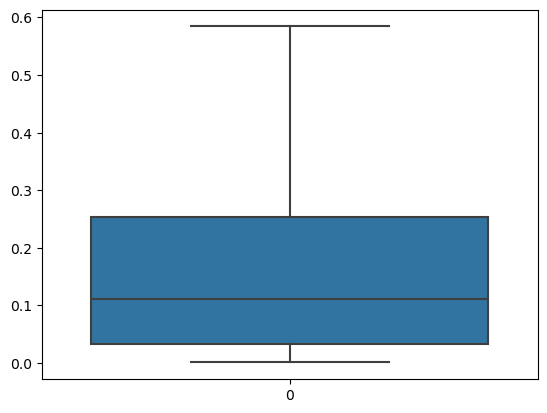

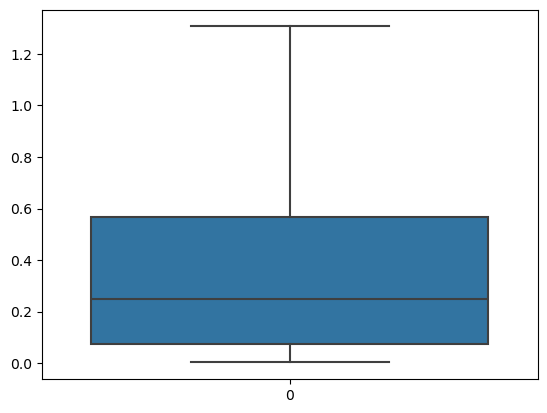

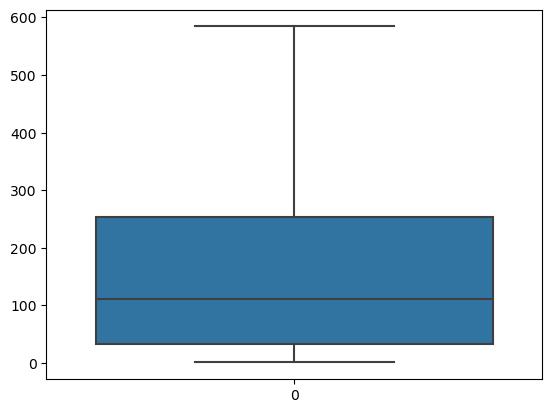

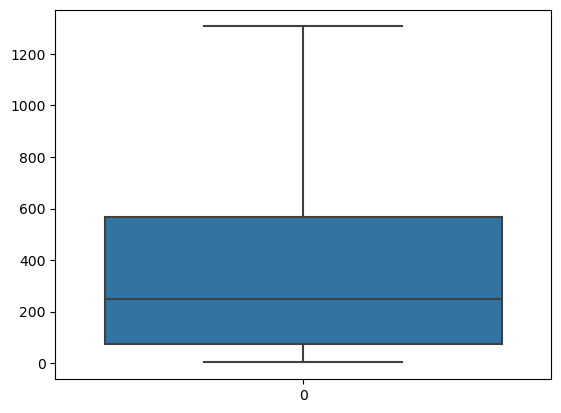

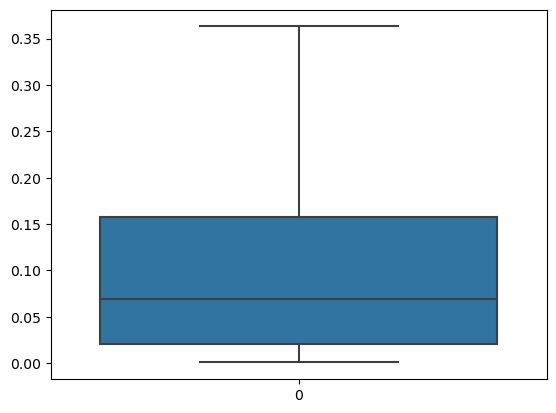

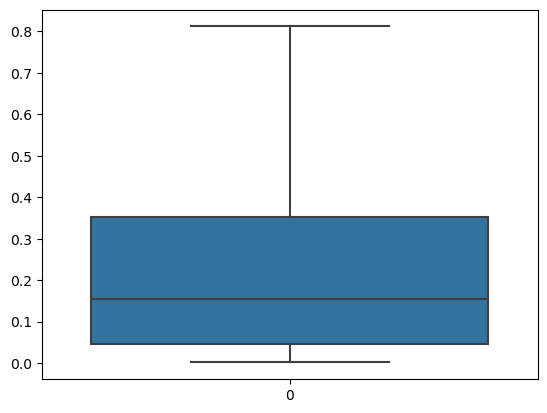

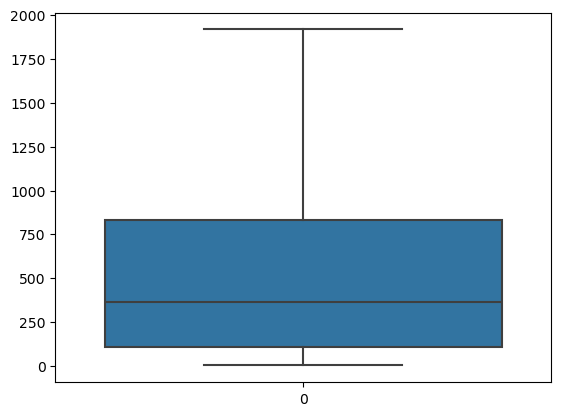

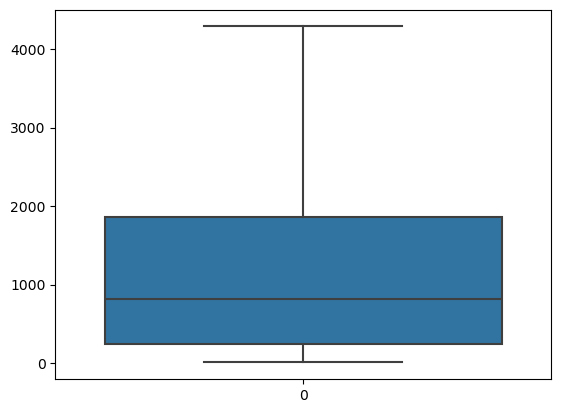

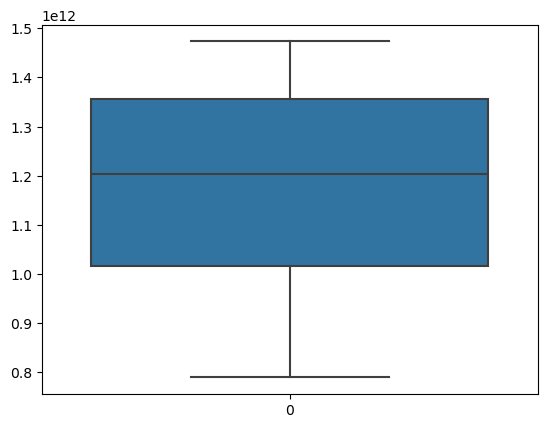

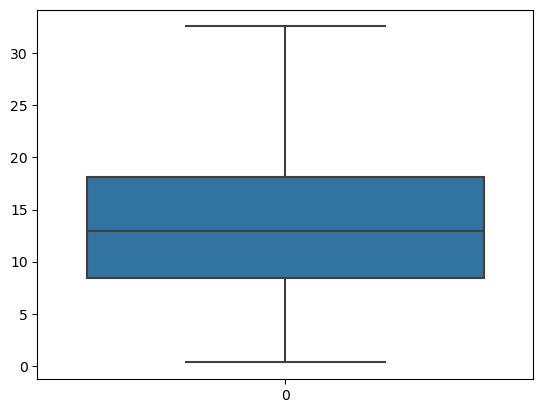

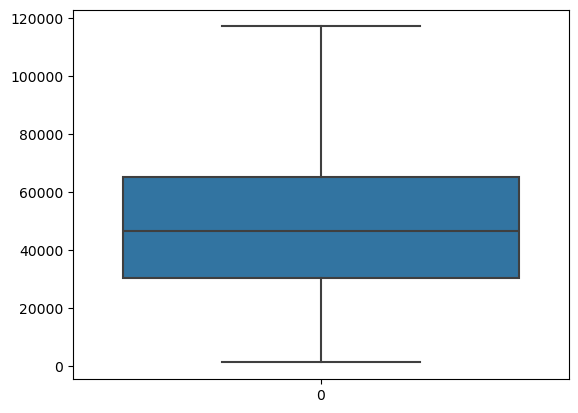

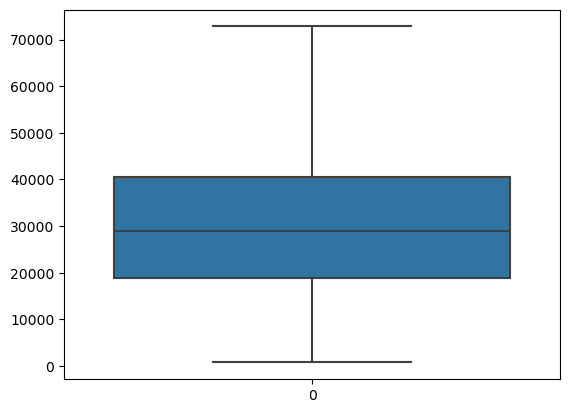

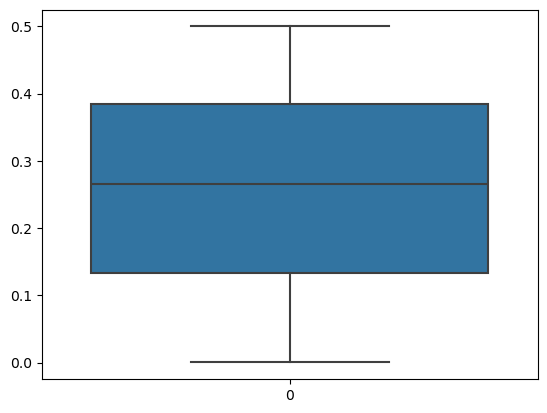

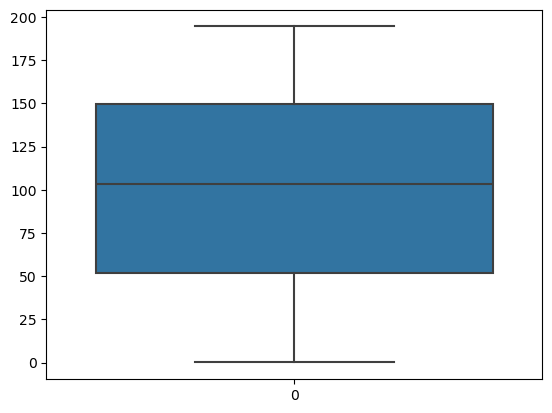

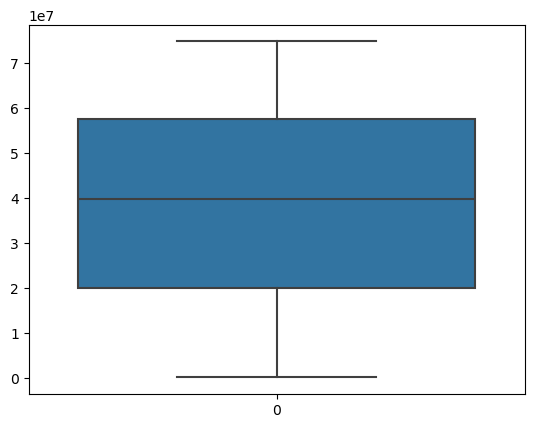

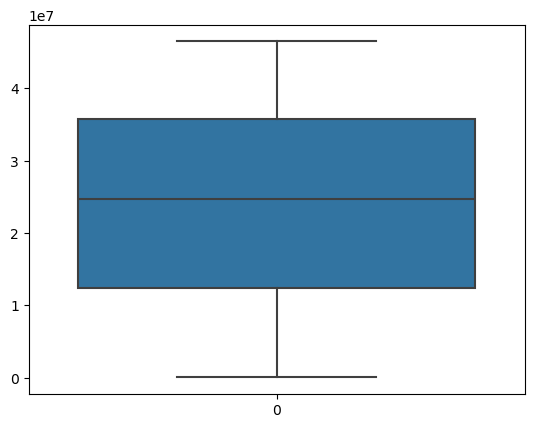

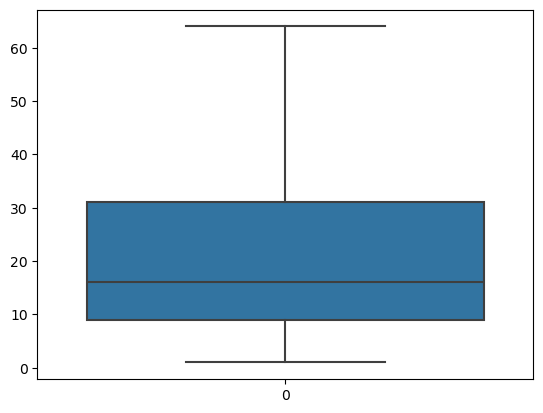

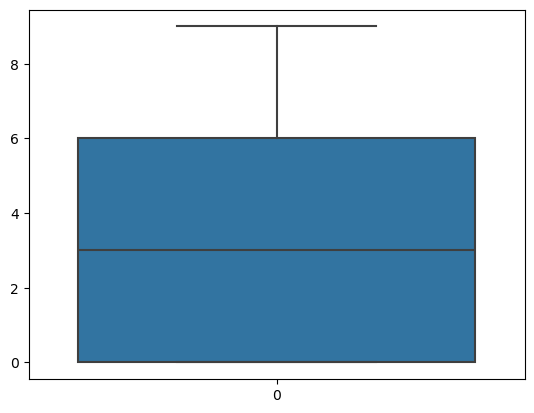

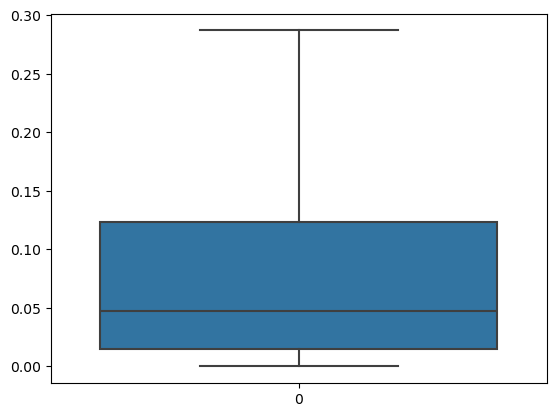

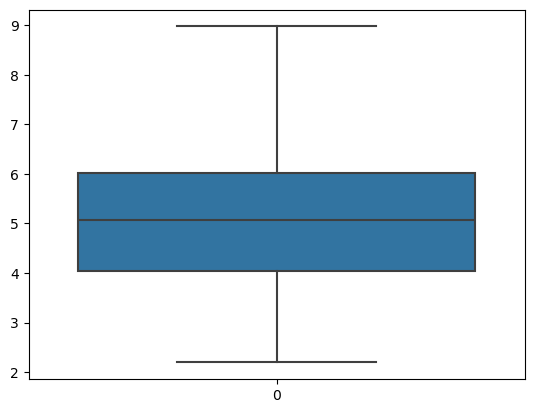

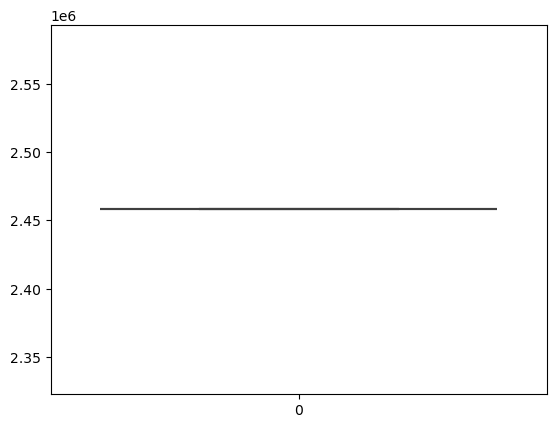

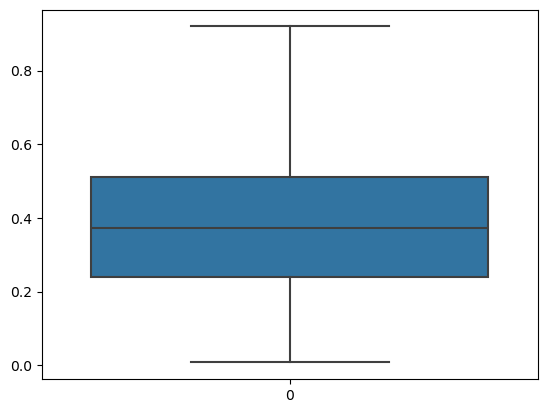

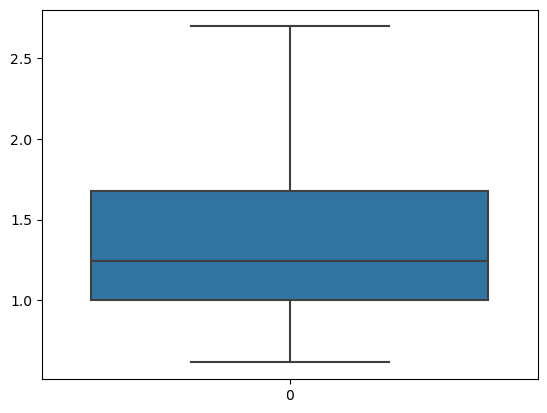

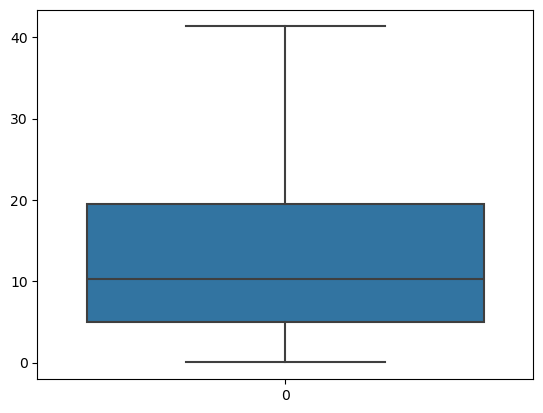

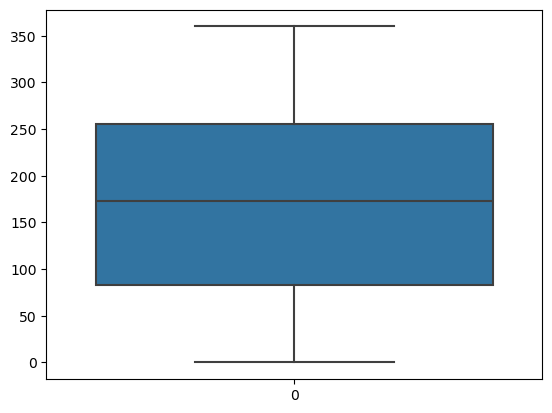

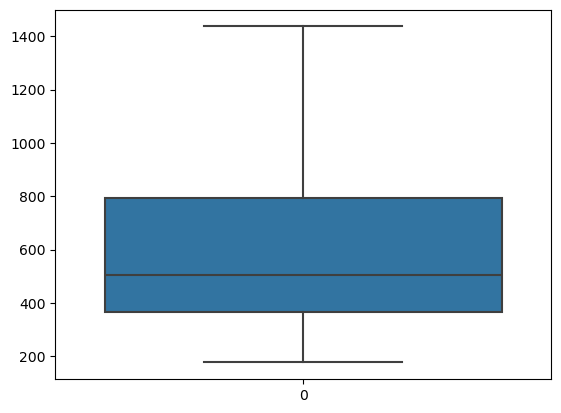

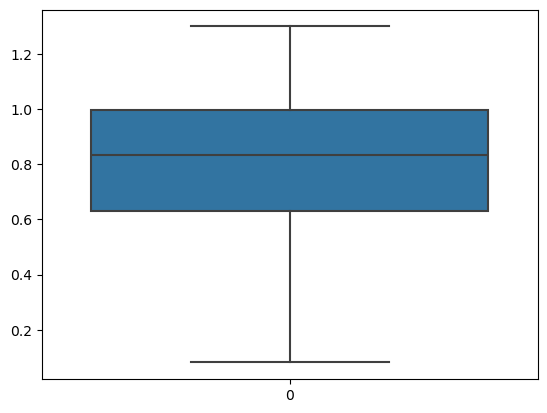

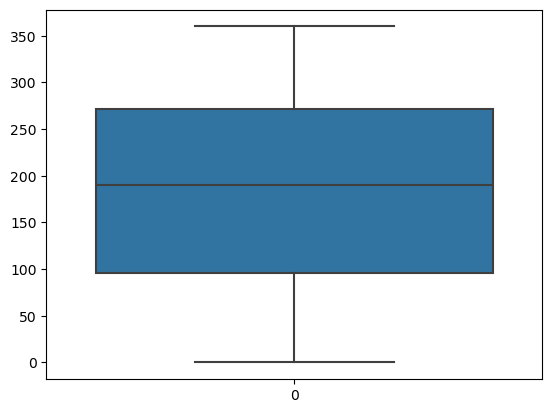

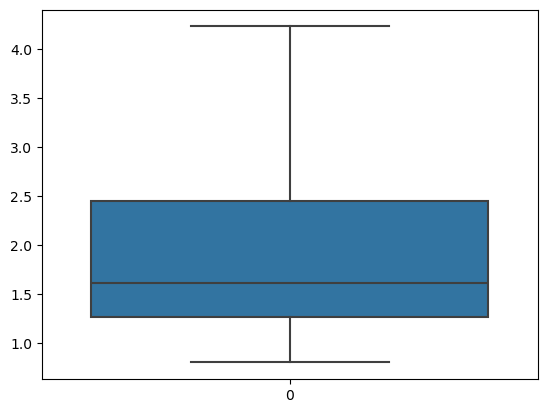

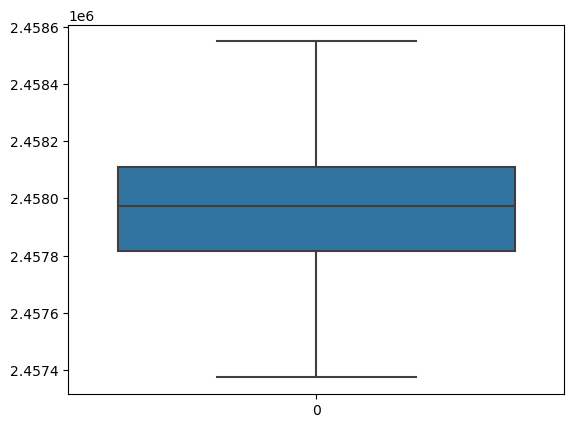

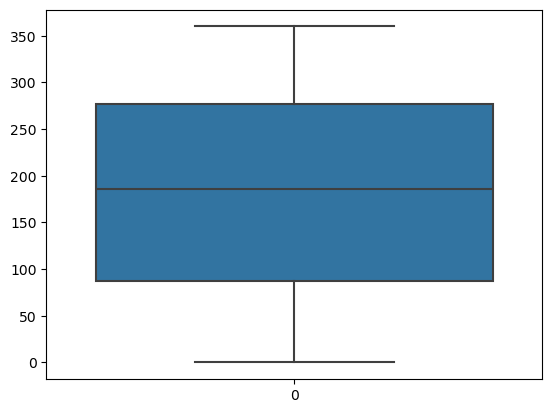

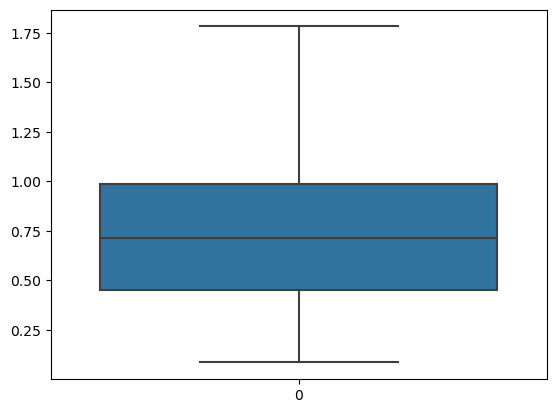

In [15]:
for col in num_cols:
    sns.boxplot(num_cols[col])
    plt.show()

## SCALING - STANDARDSCALER

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols_scaled= scaler.fit_transform(num_cols)

In [19]:
num_cols_scaled=pd.DataFrame(num_cols_scaled,columns=num_cols.columns)
#scaled_num_df = pd.DataFrame(scaled_num_cols, columns=num_cols.columns)

In [20]:
num_cols_scaled.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,0.794998,0.794998,-0.231334,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-1.973087,-1.103836,-1.103836,-1.103836,1.116075,1.116075,1.116075,1.116075,-0.330218,0.481822,-0.656394,-0.341049,0.0,0.238326,0.022344,-0.697475,1.377191,-0.047060,-0.021173,-1.223886,0.035693,0.840785,0.778393,-0.431537
1,0.834235,0.834235,-0.335202,-0.151182,-0.151182,-0.151182,-0.151182,-0.151182,-0.151182,-0.151182,-0.151182,-1.973087,0.600413,0.600413,0.600413,0.865921,0.865921,0.865921,0.865921,-0.114454,-0.167955,1.285921,0.323920,0.0,-0.171204,-0.565038,1.489624,-0.343192,-0.586658,-0.393268,1.247897,-0.523224,-0.489415,-0.069093,0.314732
2,-1.566251,-1.566251,-0.681432,0.342359,0.342359,0.342359,0.342359,0.342359,0.342359,0.342359,0.342359,-1.970035,-0.894340,-0.894340,-0.894340,-1.411843,-1.411843,-1.411843,-1.411843,-0.060513,-1.142621,-0.442810,-0.403264,0.0,-0.190196,0.124049,-0.872156,0.845573,0.052737,0.567723,0.623011,-0.007079,0.691414,1.039404,-0.522867
3,-0.352667,-0.352667,1.776798,-0.944152,-0.944152,-0.944152,-0.944152,-0.944152,-0.944152,-0.944152,-0.944152,-1.966982,-0.385378,-0.385378,-0.385378,0.195800,0.195800,0.195800,0.195800,-0.869629,0.806711,-0.893939,0.029814,0.0,-0.920117,-0.274273,-0.513817,-1.113477,-0.327586,0.704525,-1.596341,-0.489637,-0.099910,-1.045928,-0.110140
4,0.441096,0.441096,-0.231334,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-0.260065,-1.966982,-0.574727,-0.574727,-0.574727,1.036159,1.036159,1.036159,1.036159,0.101311,-0.817732,-0.542055,0.079101,0.0,-0.954102,-0.333727,0.354446,-0.847599,-0.381873,0.637530,-0.248001,-0.538405,-0.418726,-0.428186,-0.033637


In [21]:
cat_cols.head()

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,1995-01-01,Earth,2017-04-06 08:36:37,J2000,True
1,1995-01-01,Earth,2017-04-06 08:32:49,J2000,False
2,1995-01-08,Earth,2017-04-06 09:20:19,J2000,True
3,1995-01-15,Earth,2017-04-06 09:15:49,J2000,False
4,1995-01-15,Earth,2017-04-06 08:57:58,J2000,True


In [22]:
cat_cols.isnull().sum()

Close Approach Date         0
Orbiting Body               0
Orbit Determination Date    0
Equinox                     0
Hazardous                   0
dtype: int64

## ENCODING - LABEL ENCODING

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [24]:
cat_cols_encoded=cat_cols.apply(le.fit_transform)
cat_cols_encoded.head()

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox,Hazardous
0,0,0,534,0,1
1,0,0,432,0,0
2,1,0,1910,0,1
3,2,0,1761,0,0
4,2,0,1190,0,1


## CONCATING NUM,CAT COLUMNS

In [25]:
df_final=pd.concat([num_cols_scaled,cat_cols_encoded],axis=1)

In [26]:
x=df_final.drop("Hazardous",axis=1)
y=df_final["Hazardous"]

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

## PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components=39)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

## RandomForestClassifier

In [29]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train, y_train)
y_pred=RF.predict(x_test)
from sklearn.metrics import accuracy_score
training_score = RF.score(x_train, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_test,y_pred)*100)

Training Score : 100.0
accuracy_score :  99.50248756218906


## RandomForestClassifier with PCA

In [30]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=42)
RF.fit(x_train_pca, y_train)
y_pred=RF.predict(x_test_pca)
from sklearn.metrics import accuracy_score
training_score = RF.score(x_train_pca, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_test,y_pred)*100)

Training Score : 100.0
accuracy_score :  90.33404406538736


## GradientBoostingClassifier

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
GBR = GradientBoostingClassifier(random_state=42)
GBR.fit(x_train, y_train)
y_pred=GBR.predict(x_test)
from sklearn.metrics import accuracy_score
training_score = GBR.score(x_train, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_test,y_pred)*100)

Training Score : 100.0
accuracy_score :  99.50248756218906


## GradientBoostingClassifier with PCA

In [32]:
from sklearn.ensemble import GradientBoostingClassifier
GBR = GradientBoostingClassifier(random_state=42)
GBR.fit(x_train_pca, y_train)
y_pred=GBR.predict(x_test_pca)
from sklearn.metrics import accuracy_score
training_score = GBR.score(x_train_pca, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_test,y_pred)*100)

Training Score : 98.35365853658537
accuracy_score :  92.03980099502488


## LogisticRegression

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=21)
LR.fit(x_train, y_train)
y_pred=LR.predict(x_test)
from sklearn.metrics import accuracy_score
training_score = LR.score(x_train, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_pred,y_test)*100)

Training Score : 92.95731707317073
accuracy_score :  92.96375266524521


## LogisticRegression with PCA

In [34]:
LR= LogisticRegression(random_state=21)
LR.fit(x_train_pca, y_train)
y_pred = LR.predict(x_test_pca)
training_score = LR.score(x_train, y_train)*100
print(f'Training Score : {training_score}')
print("accuracy_score : ",accuracy_score(y_pred,y_test)*100)

Training Score : 76.49390243902438
accuracy_score :  92.96375266524521


## LogisticRegression with RIDGE(L2)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training Ridge (L2) Logistic Regression model
ridge_logreg = LogisticRegression(penalty='l2', solver='newton-cg',max_iter=1000)
ridge_logreg.fit(x_train, y_train)

# Predict and evaluate the model
y_pred_ridge = ridge_logreg.predict(x_test)
y_train_pred_ridge = ridge_logreg.predict(x_train)

ridge_training_score = accuracy_score(y_train_pred_ridge, y_train)*100
ridge_testing_accuracy = accuracy_score(y_test, y_pred_ridge)*100

print(f'Ridge Logistic Regression Training Accuracy: {ridge_training_score}')
print(f'Ridge Logistic Regression Testing Accuracy: {ridge_testing_accuracy}')
print('\n\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ridge))
print('\n\n')
print('Classification Report:\n', classification_report(y_test, y_pred_ridge))

Ridge Logistic Regression Training Accuracy: 96.1280487804878
Ridge Logistic Regression Testing Accuracy: 96.65955934612651



Confusion Matrix:
 [[1175   19]
 [  28  185]]



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1194
           1       0.91      0.87      0.89       213

    accuracy                           0.97      1407
   macro avg       0.94      0.93      0.93      1407
weighted avg       0.97      0.97      0.97      1407



## LogisticRegression with RIDGE(L2) , PCA

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training Ridge (L2) Logistic Regression model
ridge_logreg = LogisticRegression(penalty='l2', solver='newton-cg',max_iter=1000)
ridge_logreg.fit(x_train_pca, y_train)

# Predict and evaluate the model
y_pred_ridge = ridge_logreg.predict(x_test_pca)
y_train_pred_ridge = ridge_logreg.predict(x_train_pca)

ridge_training_score = accuracy_score(y_train_pred_ridge, y_train)*100
ridge_testing_accuracy = accuracy_score(y_test, y_pred_ridge)*100

print(f'Ridge Logistic Regression Training Accuracy: {ridge_training_score}')
print(f'Ridge Logistic Regression Testing Accuracy: {ridge_testing_accuracy}')
print('\n\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_ridge))
print('\n\n')
print('Classification Report:\n', classification_report(y_test, y_pred_ridge))

Ridge Logistic Regression Training Accuracy: 96.1280487804878
Ridge Logistic Regression Testing Accuracy: 96.65955934612651



Confusion Matrix:
 [[1175   19]
 [  28  185]]



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1194
           1       0.91      0.87      0.89       213

    accuracy                           0.97      1407
   macro avg       0.94      0.93      0.93      1407
weighted avg       0.97      0.97      0.97      1407



## LogisticRegression with LASSO(L1)

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training Ridge (L2) Logistic Regression model
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
lasso_logreg.fit(x_train, y_train)

# Predict and evaluate the model
y_pred_lasso = lasso_logreg.predict(x_test)
y_train_pred_lasso = lasso_logreg.predict(x_train)

lasso_training_score = accuracy_score(y_train_pred_lasso, y_train)*100
lasso_testing_accuracy = accuracy_score(y_test, y_pred_ridge)*100

print(f'Ridge Logistic Regression Training Accuracy: {lasso_training_score}')
print(f'Ridge Logistic Regression Testing Accuracy: {lasso_testing_accuracy}')
print('\n\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lasso))
print('\n\n')
print('Classification Report:\n', classification_report(y_test, y_pred_lasso))

Ridge Logistic Regression Training Accuracy: 96.25
Ridge Logistic Regression Testing Accuracy: 96.65955934612651



Confusion Matrix:
 [[1175   19]
 [  27  186]]



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1194
           1       0.91      0.87      0.89       213

    accuracy                           0.97      1407
   macro avg       0.94      0.93      0.94      1407
weighted avg       0.97      0.97      0.97      1407



## LogisticRegression with LASSO(L1) , PCA

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Training Ridge (L2) Logistic Regression model
lasso_logreg = LogisticRegression(penalty='l1', solver='liblinear',max_iter=1000)
lasso_logreg.fit(x_train_pca, y_train)

# Predict and evaluate the model
y_pred_lasso = lasso_logreg.predict(x_test_pca)
y_train_pred_lasso = lasso_logreg.predict(x_train_pca)

lasso_training_score = accuracy_score(y_train_pred_lasso, y_train)*100
lasso_testing_accuracy = accuracy_score(y_test, y_pred_ridge)*100

print(f'Ridge Logistic Regression Training Accuracy: {lasso_training_score}')
print(f'Ridge Logistic Regression Testing Accuracy: {lasso_testing_accuracy}')
print('\n\n')
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lasso))
print('\n\n')
print('Classification Report:\n', classification_report(y_test, y_pred_lasso))

Ridge Logistic Regression Training Accuracy: 96.15853658536585
Ridge Logistic Regression Testing Accuracy: 96.65955934612651



Confusion Matrix:
 [[1173   21]
 [  25  188]]



Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1194
           1       0.90      0.88      0.89       213

    accuracy                           0.97      1407
   macro avg       0.94      0.93      0.94      1407
weighted avg       0.97      0.97      0.97      1407



In [39]:
import os
os.environ['GIT_PYTHON_REFRESH']='quiet'
os.environ['MLFLOW_TRACKING_URI']="file:/Users/DELL/Documents/Balaji"

In [40]:
import mlflow

In [41]:
mlflow.set_experiment("NASA_CLASSIFICATION_3_PREDICTION")
mlflow.set_experiment_tag("NASA_CLASSIFICATION_3-tag",'ex1')

2024/07/31 15:36:45 INFO mlflow.tracking.fluent: Experiment with name 'NASA_CLASSIFICATION_3_PREDICTION' does not exist. Creating a new experiment.


In [42]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

with mlflow.start_run():
    # Initialize model objects
    RandFor = RandomForestClassifier(n_estimators=5000, max_depth=6)
    GBM = GradientBoostingClassifier(n_estimators=3000, max_depth=6, learning_rate=0.01, min_samples_split=5)
    LogReg = LogisticRegression(max_iter=1000)
    XGBoost = XGBClassifier(n_estimators=3000, max_depth=6, learning_rate=0.01, min_child_weight=5)

    # Logging parameters
    mlflow.log_param("rf_n_estimators", 5000)
    mlflow.log_param('rf_max_depth', 6)
    mlflow.log_param('gbm_n_estimators', 3000)
    mlflow.log_param('gbm_max_depth', 6)
    mlflow.log_param('gbm_learning_rate', 0.01)
    mlflow.log_param('gbm_minimum_samples_split', 5)
    mlflow.log_param('logreg_max_iter', 1000)
    mlflow.log_param('xgb_n_estimators', 3000)
    mlflow.log_param('xgb_max_depth', 6)
    mlflow.log_param('xgb_learning_rate', 0.01)
    mlflow.log_param('xgb_min_child_weight', 5)

    # Training models
    rf = RandFor.fit(x_train, y_train)
    gbm = GBM.fit(x_train, y_train)
    logreg = LogReg.fit(x_train, y_train)
    xgb = XGBoost.fit(x_train, y_train)

    # Training scores
    training_score_rf = RandFor.score(x_train, y_train)
    training_score_gbm = GBM.score(x_train, y_train)
    training_score_logreg = LogReg.score(x_train, y_train)
    training_score_xgb = XGBoost.score(x_train, y_train)

    # Logging training scores
    mlflow.log_metric("rf_training_score", training_score_rf)
    mlflow.log_metric("gbm_training_score", training_score_gbm)
    mlflow.log_metric("logreg_training_score", training_score_logreg)
    mlflow.log_metric("xgb_training_score", training_score_xgb)

    # Value predictions
    y_pred_rf = rf.predict(x_test)
    y_pred_gbm = gbm.predict(x_test)
    y_pred_logreg = logreg.predict(x_test)
    y_pred_xgb = xgb.predict(x_test)

    # Prediction evaluations
    testing_score_rf = accuracy_score(y_pred_rf, y_test)
    testing_score_gbm = accuracy_score(y_pred_gbm, y_test)
    testing_score_logreg = accuracy_score(y_pred_logreg, y_test)
    testing_score_xgb = accuracy_score(y_pred_xgb, y_test)

    # Logging evaluation scores
    mlflow.log_metric("rf_testing_score", testing_score_rf)
    mlflow.log_metric("gbm_testing_score", testing_score_gbm)
    mlflow.log_metric("logreg_testing_score", testing_score_logreg)
    mlflow.log_metric("xgb_testing_score", testing_score_xgb)

    # Logging models
    mlflow.sklearn.log_model(rf, "random-forest-model")
    mlflow.sklearn.log_model(gbm, "gradient-boosting-model")
    mlflow.sklearn.log_model(logreg, "logistic-regression-model")
    mlflow.sklearn.log_model(xgb, "xgboost-model")